# Preview Local Minimum Result

In [1]:
import pickle

In [2]:
data = pickle.load(open('data_local_min.pickle','rb'))

In [3]:
data['x'][0],data['x'][-1]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 6.67011023e-08,  1.50508789e-09, -9.87893289e-08,  1.39853201e-06,
         7.27614837e-08, -9.93011059e-09,  3.15790883e-07, -1.05658970e-06,
         3.75656790e-07, -1.81167549e-07,  2.68313699e-07,  4.63747213e-07]))

In [4]:
data['y'][0],data['y'][-1]

(-0.633014553398316, -1.0793095383131706)

# pipe_info start from NL center

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# pipe_info = np.loadtxt('../pipeinfo.in')
# index_NLcenter = np.argmin(pipe_info[:,1])

pipe_info = np.loadtxt('pipeinfo.in')

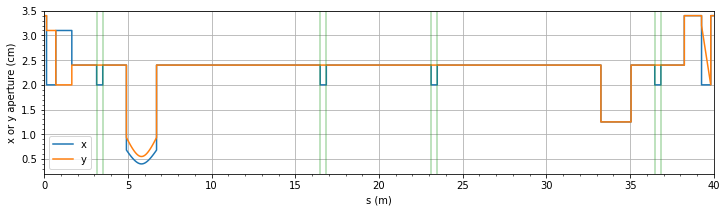

In [7]:
plt.figure(figsize=(12,3))
plt.plot(pipe_info[:,0],pipe_info[:,1]*100)
plt.plot(pipe_info[:,0],pipe_info[:,2]*100)
plt.plot(pipe_info[:,0],(pipe_info[:,3]-1)*10,alpha=0.4)
plt.grid()
plt.ylim((0.2,3.5))
plt.xlim((0.0, 40))
plt.minorticks_on()
plt.legend(('x','y'))
plt.xlabel('s (m)')
plt.ylabel('x or y aperture (cm)');

In [8]:
pipe_info = np.loadtxt('../pipeinfo.in')
index_NLcenter = np.argmin(pipe_info[:,1])

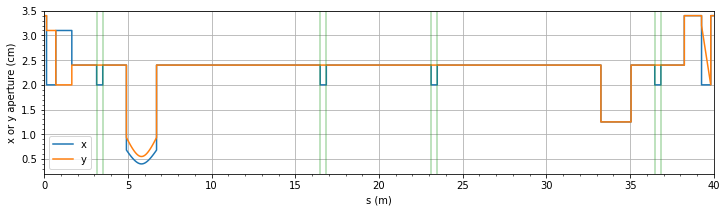

In [9]:
plt.figure(figsize=(12,3))
plt.plot(pipe_info[:,0],pipe_info[:,1]*100)
plt.plot(pipe_info[:,0],pipe_info[:,2]*100)
plt.plot(pipe_info[:,0],(pipe_info[:,3]-1)*10,alpha=0.4)
plt.grid()
plt.ylim((0.2,3.5))
plt.xlim((0.0, 40))
plt.minorticks_on()
plt.legend(('x','y'))
plt.xlabel('s (m)')
plt.ylabel('x or y aperture (cm)');

In [10]:
L_tot = pipe_info[-1,0]
s_NLmid = pipe_info[index_NLcenter,0]
print(s_NLmid, L_tot)
print(pipe_info[index_NLcenter-2:index_NLcenter+3,:])

5.811519140000001 39.968229720000004
[[5.72580485e+00 4.03422000e-03 5.54705000e-03 2.00000000e+00]
 [5.76866200e+00 4.00858000e-03 5.51180000e-03 2.00000000e+00]
 [5.81151914e+00 4.00000000e-03 5.50000000e-03 2.00000000e+00]
 [5.85437628e+00 4.00858000e-03 5.51180000e-03 2.00000000e+00]
 [5.89723343e+00 4.03422000e-03 5.54705000e-03 2.00000000e+00]]


In [11]:
pipe_info[:,0] = pipe_info[:,0] - s_NLmid
pipe_info[:index_NLcenter,0] = pipe_info[:index_NLcenter,0] + L_tot
pipe_info = np.concatenate((pipe_info[index_NLcenter:,:],pipe_info[:index_NLcenter+1,:]),axis=0)

In [12]:
pipe_info[-1,0] = L_tot

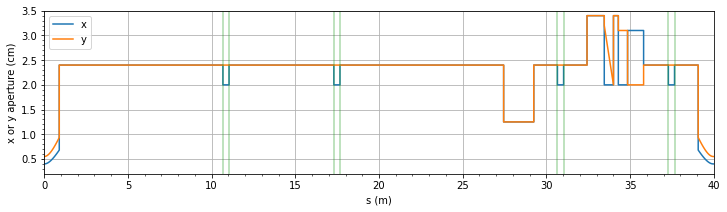

In [13]:
plt.figure(figsize=(12,3))
plt.plot(pipe_info[:,0],pipe_info[:,1]*100)
plt.plot(pipe_info[:,0],pipe_info[:,2]*100)
plt.plot(pipe_info[:,0],(pipe_info[:,3]-1)*10,alpha=0.4)
plt.grid()
plt.ylim((0.2,3.5))
plt.xlim((0.0, 40))
plt.minorticks_on()
plt.legend(('x','y'))
plt.xlabel('s (m)')
plt.ylabel('x or y aperture (cm)');

In [14]:
np.savetxt('pipeinfo.in',pipe_info)

In [15]:
pipe_info[-4:,:]

array([[3.98396583e+01, 4.07659000e-03, 5.60531000e-03, 2.00000000e+00],
       [3.98825154e+01, 4.03422000e-03, 5.54705000e-03, 2.00000000e+00],
       [3.99253726e+01, 4.00858000e-03, 5.51180000e-03, 2.00000000e+00],
       [3.99682297e+01, 4.00000000e-03, 5.50000000e-03, 2.00000000e+00]])

# Dynamic aperture check

In [16]:
import pImpactR as impact
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as copy

rectangular_ = 1
elliptic_ = 2

nCore_y = 2
nCore_z = 2
nturn = 512  # each period
order = 3

In [17]:
emitGeomRMS = 3.3e-6
sigma_K = 2.0e-3
pipe = 0.025

In [18]:
NL_t = 0.4
NL_L = 1.8
NL_c = 0.01
NL_nu = 0.3
NL_beta = 0.5*NL_L/np.tan(np.pi*NL_nu)

In [19]:
beam,lattice = impact.readInputFile('test_iota_v8_4_SextOff_NLon.in')
beam.nCore_y = nCore_y
beam.nCore_z = nCore_z
ke = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency
g = ke/mass+1.0
bg = np.sqrt(g**2-1.0)
emitN = emitGeomRMS*bg

reading ImpactZ input file (test_iota_v8_4_SextOff_NLon.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [20]:
ap1_x,ap1_y = 4e-3, 5.5e-3
ang = np.arange(0.0,2*np.pi,2*np.pi/1024)
c = np.cos(ang)
s = np.sin(ang)

In [21]:
nx = 100
testP = 0.0
sig = 0.015
k=1
q_m = beam.multi_charge.q_m[0]
pTest = []
for x in np.linspace(-ap1_x*1.2,ap1_x*1.2,100):
    for y in np.linspace(-ap1_y*1.2,ap1_y*1.2,100):
        if (x/ap1_x)**2 + (y/ap1_y)**2 <= 1.2**2:
            pTest.append([x,0.0,y,0.0,0.0,0.0,q_m,0.0,k])    
            k=k+1
            
pTest0 = np.array(pTest)
pTest1 = copy(pTest0)
pTest2 = copy(pTest0)
npt = len(pTest0)

pTest0[:, 5] = -2*sigma_K*ke

pTest1[:,-1] = pTest1[:,-1] + npt

pTest2[:,5] =  2*sigma_K*ke
pTest2[:,-1] = pTest2[:,-1] + 2*npt

pTest = np.concatenate((pTest0,pTest1,pTest2))

impact.writeParticleData(pTest,ke,mass,freq)
beam.n_particles = 3*npt
npt,3*npt

(7668, 23004)

In [22]:
cleanLat = impact.clearLattice(lattice)
for item in cleanLat:
    if item.type == 'RFkick':
        item.vmax = 0.0
    if 'length' in item:
        item.n_sckick = int(np.ceil(item.length*50))
        item.n_map = 1
    if 'pipe_radius' in item and item.type is not 'dipole':
        item.pipe_radius = pipe

for iNL,elem in enumerate(cleanLat):
    if 'nonlinear' in elem.type:
        break

NL0 = impact.getElem('nonlinear_insert_sliced')

NL0.length = 0.9
NL0.start_position = 0.0
NL0.total_length = 1.8

NL0.tune_advance = 0.3
NL0.strength_t = 0.4
NL0.transverse_scale_c = 0.01

NL0.n_map = 45
NL0.n_sckick = 1

NL1 = copy(NL0)
NL1.start_position = 0.9

cleanLat =  [NL1] + cleanLat[iNL+1:] + cleanLat[:iNL] + [NL0]

# add QFF
cleanLat = impact.addHardEdgeQuad(cleanLat)

In [23]:
Sext=[]
flagNewSext = False
j=-1
for i,elem in enumerate(cleanLat):
#     print(i,elem.type,flagNewSext)
    if elem.type in ['quad','dipole']:
        flagNewSext = False
    if elem.type == 'multipole_thin':
        if not flagNewSext:
            flagNewSext = True
            j = j+1
            Sext.append(elem)
            elem.sext_family = j
        else:
            cleanLat[i] = Sext[j]

In [24]:
loop = impact.getElem('loop')

writeIn = impact.getElem('write_raw_ptcl')
writeIn.turn = 1
writeIn.file_id = 100000
writeIn.format_id = 2

writetmp = impact.getElem('write_raw_ptcl')
writetmp.format_id = 2
writetmp.file_id = 100000 + nturn

writeOut = impact.getElem('write_raw_ptcl')
writeOut.format_id = 2
writeOut.turn = nturn
writeOut.file_id = 100000 - nturn


In [25]:
latticeF = [loop, impact.getElem('pipeinfo'), writeIn] + cleanLat + [writetmp]

In [26]:
int = np.vectorize(int)

def getDA_data(SextStr):
    beam.distribution.distribution_type = 'ReadFile'
    
    # ==== run foward (from NL mid point) ====   
    for i,item in enumerate(Sext):
        item.KL_sext = SextStr[i]
        
    loop.turns = nturn
    writetmp.turn = nturn
    impact.writeInputFile(beam, latticeF)
    impact.run(beam,order=order)
  
        
    # ==== run backward  ====
    loop.turns = nturn  
    beam.distribution.distribution_type = 'ReadFile_binary'
    beam.distribution.file_id = writetmp.file_id
    
    cleanLat_backward = impact.getInverseLattice(cleanLat)
    latticeB = [loop] + cleanLat_backward + [writeOut]    
      
    impact.writeInputFile(beam, latticeB)
    impact.run(beam,order=order)
    
    
    # collect data
#     pDataIn  = impact.readParticleData(writeIn.file_id,  ke,mass,freq, writeIn.format_id)
    pDataOut = impact.readParticleData(writeOut.file_id, ke,mass,freq, writeOut.format_id)
    
    iSurvived = np.in1d(pTest[:,-1],pDataOut[:,-1])
    pDataIn = pTest[iSurvived,:]
    
    diff = np.log10(
              np.sqrt(
                       (pDataIn[:,0] - pDataOut[:,0])**2/(NL_beta*NL_c*NL_c) + 
                       (pDataIn[:,2] - pDataOut[:,2])**2/(NL_beta*NL_c*NL_c) +
                       (pDataIn[:,1] - pDataOut[:,1])**2*NL_beta/(NL_c*NL_c) + 
                       (pDataIn[:,3] - pDataOut[:,3])**2*NL_beta/(NL_c*NL_c) 
                     ) 
                   )
    ind = int(pDataIn[:,-1])
    ind0 = ind<  npt
    ind1 = (  npt<=ind) * (ind<2*npt)
    ind2 = (2*npt<=ind) * (ind<3*npt)
    return ind[ind0],ind[ind1],ind[ind2], diff[ind0], diff[ind1], diff[ind2]

In [ ]:
indx = [0]*3
diff = [0]*3

indx[0],indx[1],indx[2],diff[0],diff[1],diff[2] = getDA_data(data['x'][-1])

In [ ]:
txt = [r'$\delta=-2\sigma_{\delta}$',r'$\delta=0$',r'$\delta=+2\sigma_{\delta}$']
fig = plt.figure(figsize=[4+3.3+3.3,3.3])
for i in range(3):
    plt.subplot(1,3,i+1)
    d = diff[i]
    x = pTest[indx[i],0]
    y = pTest[indx[i],2]
    f1=plt.scatter(x*1e3,y*1e3,c=d,s=3.5,marker='s')
    plt.scatter(x*1e3,-y*1e3,c=d,s=3.5,marker='s')
    plt.plot(ap1_x*c*1e3,ap1_y*s*1e3,alpha=0.7,c='k',lw=2)
    plt.xlim(-ap1_x*1.3*1e3,ap1_x*1.3*1e3)
    plt.ylim(-ap1_y*1.3*1e3,ap1_y*1.3*1e3)
    plt.xlabel('$x (mm)$')
    if j==0:
        plt.ylabel('$y (mm)$')
    else:
        plt.yticks([])
    plt.text(-4.9,6.1,txt[i])
    plt.colorbar(f1)
plt.tight_layout()
plt.savefig('DA_localMinReally_wAperture_T'+str(nturn)+'.png',dpi=180)

# Particle loss test

In [27]:
NL_t = 0.4
emitGeomRMS = 3.3e-6
npt = 50000
print('npt=',npt)
nturn = 2000
dE = 2.0e-3

npt= 50000


In [28]:
pipe_info = np.loadtxt('../pipeinfo.in')
np.savetxt('pipeinfo.in',pipe_info)

In [29]:
def getLostDataExponential(deco,betx,alfx,emitx,bety,alfy,emity,tauMag,npt,nturn,order=3):
    
    # read file
    beam,lattice = impact.readInputFile('test_'+deco+'.in')
    beam.nCore_y=nCore_y
    beam.nCore_z=nCore_z
    beam.n_particles = npt
    
    beam.distribution.mode = 'twiss'
    beam.distribution.distribution_type = 'Exponential2D_trunc'
    beam.distribution.betx  = betx
    beam.distribution.alfx  = alfx
    beam.distribution.emitx = emitx
    beam.distribution.CLx   = 6.0
    beam.distribution.bety  = bety
    beam.distribution.alfy  = alfy
    beam.distribution.emity = emity
    beam.distribution.CLy   = 6.0
    beam.distribution.betz  = 200
    beam.distribution.alfz  = 0.0
    beam.distribution.emitz = (dE*ke*1.0e-6)**2*beam.distribution.betz
    
    # adjust kick number
    cleanLat = impact.clearLattice(lattice)
    for item in cleanLat:
        if item.type == 'RFkick':
            item.vmax = 0.0
        if item.type == 'nonlinear_insert':
            NLfoward = item
        if 'length' in item:
            item.n_sckick = int(np.ceil(item.length*50))
            item.n_map = 1
    NLfoward.n_sckick = 90
    NLfoward.n_map = 1
    NLfoward.strength_t = tauMag
    
    
    # add QFF
    cleanLat = impact.addHardEdgeQuad(cleanLat)
    
    # ==== run foward (from injection point) ====
    cleanLat.insert(0,impact.getElem('pipeinfo'))
    cleanLat.insert(1,impact.getElem('loop'))
    cleanLat[1].turns = nturn
    
    write1 = impact.getElem('write_raw_ptcl')
    write1.file_id = 111111
    write1.format_id = 2
    
    impact.writeInputFile(beam,cleanLat[:2]+[write1]+cleanLat[2:])
    impact.run(beam,order=order)
    pData1 = impact.readParticleData(111111,ke,mass,freq,2)
    Twiss1 = impact.getTwiss_from_pData(pData1)
    
    try:
        pLost = np.loadtxt('lost_partcl.data',skiprows=1, usecols=(0,1,2,3))
    except:
        pLost = None
        
    
    # ==== get Data ====
    fort81 = np.loadtxt('fort.81',usecols=(0,1,2,3,4,5))
    Hmean = fort81[:,1]
    Imean = fort81[:,2]
    Hstd  = fort81[:,3]
    Istd  = fort81[:,4]
    HIcor = fort81[:,5]
    
    emitx = np.loadtxt('fort.24',usecols=(0, -1))
    s = emitx[:,0]
    emitx = emitx[:,-1]
    emity = np.loadtxt('fort.25',usecols=(-1))
    
    stat = {'s'    :s,
            'emitx':emitx,
            'emity':emity,
            'Hmean':Hmean,
            'Imean':Imean,
            'Hstd' :Hstd,
            'Istd' :Istd,
            'HIcor':HIcor}
    
    data = {'Twiss1':Twiss1,
            'pData1':pData1,
            'pLost' :pLost,
            'stat'  :stat}
    
    #!rm lost_partcl.data fort.111111 test.in
    
    return data

#### adjust sextupole

In [30]:
deco = 'iota_v8_4_SextLocalMin_NLon'
beam,lattice = impact.readInputFile('test_iota_v8_4_SextOff_NLon.in')
Sext=[]
flagNewSext = False
j=-1
for i,elem in enumerate(lattice):
    if elem.type in ['quad','dipole']:
        flagNewSext = False
    if elem.type == 'multipole_thin':
        if not flagNewSext:
            flagNewSext = True
            j = j+1
            Sext.append(elem)
            elem.sext_family = j
        else:
            lattice[i] = Sext[j]

reading ImpactZ input file (test_iota_v8_4_SextOff_NLon.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [31]:
SextStrLocalMin = copy(data['x'][-1])
lastSext = SextStrLocalMin[-1]
SextStrLocalMin[1:] = SextStrLocalMin[:-1]
SextStrLocalMin[0] = lastSext
data['x'][-1],SextStrLocalMin

(array([ 6.67011023e-08,  1.50508789e-09, -9.87893289e-08,  1.39853201e-06,
         7.27614837e-08, -9.93011059e-09,  3.15790883e-07, -1.05658970e-06,
         3.75656790e-07, -1.81167549e-07,  2.68313699e-07,  4.63747213e-07]),
 array([ 4.63747213e-07,  6.67011023e-08,  1.50508789e-09, -9.87893289e-08,
         1.39853201e-06,  7.27614837e-08, -9.93011059e-09,  3.15790883e-07,
        -1.05658970e-06,  3.75656790e-07, -1.81167549e-07,  2.68313699e-07]))

In [32]:
for i,item in enumerate(Sext):
    item.KL_sext = SextStrLocalMin[i]
    
impact.writeInputFile(beam,lattice,'test_'+deco+'.in')

#### run

In [33]:
loss_data = pickle.load(open('pLossData_iota_v8_4_variousSextSettings.pickle','rb'))
deco = 'iota_v8_4_SextOff_NLon'
Twiss1 = loss_data[deco+'_thermal']['Twiss1']
betx,alfx,emitx,bety,alfy,emity,betz,alfz,emitz = Twiss1
Twiss1

(0.49524020293287413,
 0.16669260330749974,
 2.645169074698375e-06,
 2.047576820369176,
 0.4621109662791848,
 5.5814862683766e-06,
 1338.7005768170793,
 2.3611888931473417,
 0.0051337593474649855)

In [ ]:
deco = 'iota_v8_4_SextLocalMin_NLon'
if deco+'_exponential' not in data.keys():
    loss_data[deco+'_exponential']=getLostDataExponential(deco,betx,alfx,emitx,bety,alfy,emity,0.4,npt,nturn,order=3)
    pickle.dump(loss_data,open('pLossData_iota_v8_4_variousSextSettings.pickle','wb'))

reading ImpactZ input file (test_iota_v8_4_SextLocalMin_NLon.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [40]:
loss_data.keys()

dict_keys(['iota_v8_4_SextOff_NLon_thermal', 'iota_v8_4_SextOn_NLon_thermal', 'iota_v8_4_SextGoodDA_NLon_thermal', 'iota_v8_4_SextOff_NLon_exponential', 'iota_v8_4_SextOn_NLon_exponential', 'iota_v8_4_SextGoodDA_NLon_exponential', 'iota_v8_4_SextLocalMin_NLon_exponential'])

#### plot lost 

In [41]:
data = loss_data[deco+'_exponential']

In [42]:
data['stat']['emitx'][0],data['stat']['emity'][0],data['stat']['Hmean'][0],data['stat']['Imean'][0]

(1.9026352e-07, 4.0240877e-07, 0.0769609959204, 0.0722965984285)

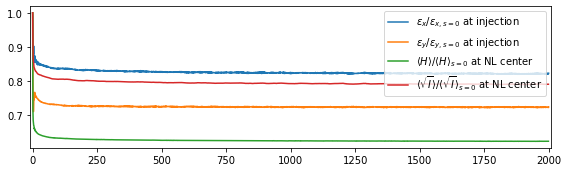

In [46]:
nskip = int(len(data['stat']['s'])/2000)

plt.figure(figsize=(8,2.5))
plt.plot(data['stat']['emitx'][::nskip]/data['stat']['emitx'][0])
plt.plot(data['stat']['emity'][::nskip]/data['stat']['emity'][0])
plt.plot(data['stat']['Hmean']/data['stat']['Hmean'][0])
plt.plot(data['stat']['Imean']/data['stat']['Imean'][0])
plt.legend([r'$\epsilon_x/\epsilon_{x,s=0}$ at injection',
            r'$\epsilon_y/\epsilon_{y,s=0}$ at injection',
            r'$\langle H \rangle/\langle H \rangle_{s=0}$ at NL center',
            r'$\langle \sqrt{I} \rangle/\langle \sqrt{I} \rangle_{s=0}$ at NL center'],
           loc=1)

plt.xlim(-10,2010)
plt.tight_layout()
plt.savefig(deco+'.stat.png',dpi=180)

In [47]:
L = pipe_info[-1][0]

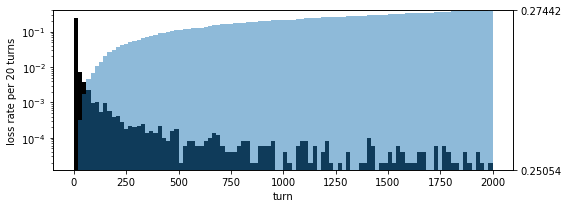

In [48]:
nlost = len(data['pLost'][:,0])

plt.figure(figsize=(8,3))
(counts, bins) = np.histogram(data['pLost'][:,0]/L, bins=100, range=(0,nturn))


ax1 = plt.hist(bins[:-1], bins, weights = counts/npt, color='k');
plt.yscale('log')
plt.xlabel('turn')
plt.ylabel('loss rate per 20 turns')
ax2 = plt.twinx()
ax2.hist(bins[:-1], bins, weights = counts/npt, cumulative=True, alpha=0.5 );
plt.ylim([counts[0]/npt,np.sum(counts)/npt]);
plt.yticks([counts[0]/npt,np.sum(counts)/npt]);

plt.tight_layout()
plt.savefig(deco+'.lostHist.png',dpi=180)

<Figure size 576x360 with 0 Axes>

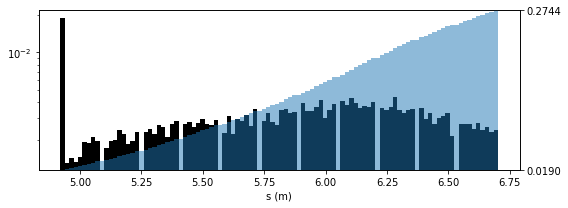

In [49]:
plt.figure(figsize=(8,5))

plt.figure(figsize=(8,3))
(counts, bins) = np.histogram(np.mod(data['pLost'][:,0],L), bins=100)


ax1 = plt.hist(bins[:-1], bins, weights = counts/npt, color='k');
plt.yscale('log')
plt.xlabel('s (m)')
# plt.ylabel('loss rate per 9 cm');
# plt.xlim(loc_NL,loc_NL+1.8)
ax2 = plt.twinx()
ax2.hist(bins[:-1], bins, weights = counts/npt, cumulative=True, alpha=0.5 );
plt.ylim([counts[0]/npt,np.sum(counts)/npt]);
plt.yticks([counts[0]/npt,np.sum(counts)/npt]);

plt.tight_layout()

In [52]:
from scipy.special import erf
from scipy.optimize import minimize

def cdf(x):
    return 0.5*(1.0+erf(x/np.sqrt(2)))

def get20percent(x):
    return (cdf(x) - 0.2)**2

def get40percent(x):
    return (cdf(x) - 0.4)**2

def get60percent(x):
    return (cdf(x) - 0.6)**2

def get80percent(x):
    return (cdf(x) - 0.8)**2


X=[minimize(get20percent,-0.08).x,minimize(get40percent,-0.02).x,minimize(get60percent,0.02).x,minimize(get80percent,0.08).x]
X

[array([-0.8416186]),
 array([-0.25334682]),
 array([0.2533468]),
 array([0.84161858])]

In [55]:
X20 = -2.0e-3 * X[0]
X40 = -2.0e-3 * X[1]

In [58]:
pDataIndex = [data['pData1'][:,5]/2.5e6 < -X20,
              data['pData1'][:,5]/2.5e6 < -X40,
              data['pData1'][:,5]/2.5e6 <  X40,
              data['pData1'][:,5]/2.5e6 <  X20,]

pDataIndex = [pDataIndex[0],
              pDataIndex[1] * (-X20 <= data['pData1'][:,5]/2.5e6),
              pDataIndex[2] * (-X40 <= data['pData1'][:,5]/2.5e6),
              pDataIndex[3] * ( X40 <= data['pData1'][:,5]/2.5e6),
                                X20 <= data['pData1'][:,5]/2.5e6 ]
    
Index = [data['pData1'][pDataIndex[i],-1] for i in range(5)]

pLostIndex = [np.in1d(data['pLost'][:,-1],Index[i]) for i in range(5)]
pLostEach = [np.sum(pLostIndex[i]) for i in range(5)]

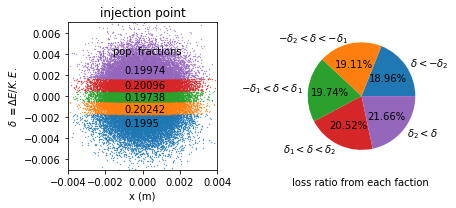

In [59]:
NPT = []
for i in range(5):
    NPT.append(len(Index[i]))
    
# plt.figure(figsize=(9.5,3))  
f, axs = plt.subplots(1,2,figsize=(6.4,3), gridspec_kw={'width_ratios': [1,0.9]})
k=0
for i in range(5):
    axs[k].scatter(data['pData1'][pDataIndex[i],0],data['pData1'][pDataIndex[i],5]/2.5e6,s=0.1)
    axs[k].scatter(1,1,color='C'+str(i))
axs[k].set_xlim(-0.004,0.004)
axs[k].set_ylim(-0.007,0.007)
axs[k].text(-0.0016, .004 ,'pop. fractions')
axs[k].text(-0.001, .00217 ,NPT[4]/npt)
axs[k].text(-0.001, .00074 ,NPT[3]/npt);
axs[k].text(-0.001,-.000429,NPT[2]/npt);
axs[k].text(-0.001,-.001548,NPT[1]/npt);
axs[k].text(-0.001,-.00287 ,NPT[0]/npt);
axs[k].set_xlabel('x (m)')
axs[k].set_ylabel(r'$\delta\,\,\equiv \Delta E/K.E.$')
axs[k].set_title('injection point')

k=1
# plt.subplot(1,3,3)
labels = [r'$ \delta < -\delta_2$',
          r'$-\delta_2 < \delta < -\delta_1$',
          r'$-\delta_1 < \delta < \delta_1$',
          r'$ \delta_1 < \delta < \delta_2$',
          r'$\delta_2 < \delta$']
axs[k].pie(pLostEach, labels = labels,autopct='%1.2f%%')
axs[k].text(-1.3,-1.65,'loss ratio from each faction')

plt.tight_layout()
plt.savefig(deco+'.popDivOverE.png',dpi=180)

In [60]:
counts, bins, patch = plt.hist([data['pLost'][pLostIndex[i],0]/L for i in range(5)], 
                                bins=20, range=(0,nturn), cumulative=True,
                                weights = [np.ones_like(data['pLost'][pLostIndex[i],0])/npt for i in range(5)]);
plt.close()

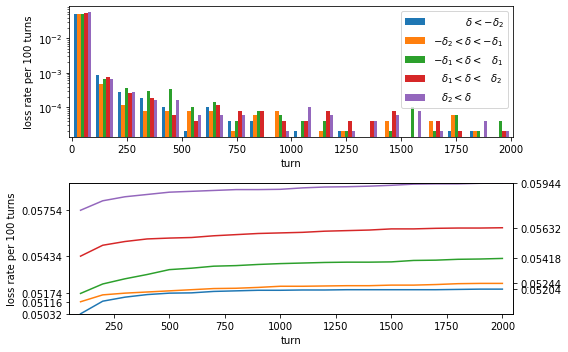

In [61]:
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
plt.hist([data['pLost'][pLostIndex[i],0]/L for i in range(5)], 
         bins=20, range=(0,nturn), 
         weights = [np.ones_like(data['pLost'][pLostIndex[i],0])/npt for i in range(5)]);

plt.yscale('log')
plt.xlabel('turn')
plt.ylabel('loss rate per 100 turns');
plt.xlim(-10,nturn+10)
plt.legend(['$\qquad\quad\,\, \delta < -\delta_2$',
            '$-\delta_2 < \delta < -\delta_1$',
            '$-\delta_1 < \delta < \,\,\,\,\,\delta_1$',
            '$\,\,\,\,\,\delta_1 < \delta < \,\,\,\,\,\delta_2$',
            '$\,\,\,\,\,\delta_2 < \delta$']);

ax1 = plt.subplot(2,1,2)
for i in range(5):
    plt.plot(bins[1:],counts[i])

plt.xlabel('turn')
plt.ylabel('loss rate per 100 turns');
plt.xlim(50,nturn+50)
plt.ylim(np.min(np.array(counts)),np.max(np.array(counts)))
plt.yticks([counts[i][0] for i in range(5)])


ax2 = ax1.twinx()
plt.xlim(50,nturn+50)
plt.ylim(np.min(np.array(counts)),np.max(np.array(counts)))
plt.yticks([counts[i][-1] for i in range(5)])

plt.tight_layout()
plt.savefig(deco+'.pLoss.eachE.overTurns.png',dpi=180)

In [64]:
L=0
for item in lattice:
    if item.type == 'nonlinear_insert':
        loc_NL =L
    if 'length' in item:
        L=L+item.length
        
loc_NL 

4.91151914291883

In [65]:
counts, bins, patch = plt.hist([np.mod(data['pLost'][pLostIndex[i],0],L) for i in range(5)], 
                                bins=20, range=(loc_NL,loc_NL+1.8), cumulative=True,
                                weights = [np.ones_like(np.mod(data['pLost'][pLostIndex[i],0],L))/npt for i in range(5)]);
plt.close()

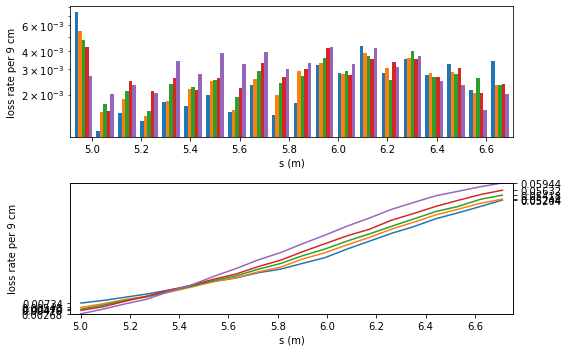

In [66]:
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
plt.hist([np.mod(data['pLost'][pLostIndex[i],0],L) for i in range(5)], 
         bins=20, 
         weights = [np.ones_like(data['pLost'][pLostIndex[i],0])/npt for i in range(5)]);

plt.yscale('log')
plt.xlabel('s (m)')
plt.ylabel('loss rate per 9 cm');
plt.xlim(loc_NL,loc_NL+1.8)


ax1 = plt.subplot(2,1,2)
for i in range(5):
    plt.plot(bins[1:],counts[i])

plt.xlabel('s (m)')
plt.ylabel('loss rate per 9 cm');
plt.xlim(loc_NL+0.045,loc_NL+1.8+0.045)
plt.ylim(np.min(np.array(counts)),np.max(np.array(counts)))
plt.yticks([counts[i][0] for i in range(5)])

ax2 = ax1.twinx()
plt.xlim(loc_NL+0.045,loc_NL+1.8+0.045)
plt.ylim(np.min(np.array(counts)),np.max(np.array(counts)))
plt.yticks([counts[i][-1] for i in range(5)])

plt.tight_layout()
plt.savefig(deco+'.pLoss.eachE.overNL.png',dpi=180)

In [68]:
ap0_x,ap0_y = 0.00680513, 0.00935705
ap1_x,ap1_y = 4.00000000e-03, 5.50000000e-03
ang = np.arange(0.0,2*np.pi,2*np.pi/1024)
c = np.cos(ang)
s = np.sin(ang)

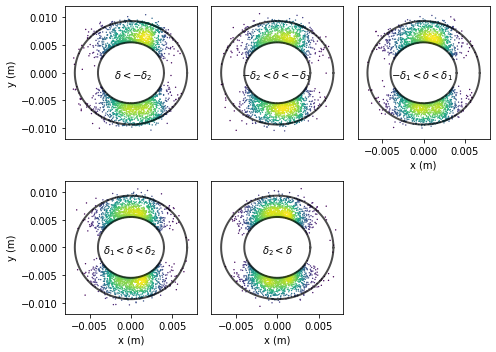

In [69]:
plt.figure(figsize=(7,5))
labels = [r'$ \delta < -\delta_2$',
          r'$-\delta_2 < \delta < -\delta_1$',
          r'$-\delta_1 < \delta < \delta_1$',
          r'$ \delta_1 < \delta < \delta_2$',
          r'$\delta_2 < \delta$']
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(ap0_x*c,ap0_y*s,alpha=0.7,c='k',lw=2)
    plt.plot(ap1_x*c,ap1_y*s,alpha=0.7,c='k',lw=2)
    # plt.scatter(data['pLost'][pLostIndex[ 0],1],data['pLost'][pLostIndex[ 0],2],s=0.1,color='C0')
    impact.plot.density(data['pLost'][pLostIndex[i],1],data['pLost'][pLostIndex[i],2],mksize=2.0)
    
    if i<2:
        plt.xticks([])
    else:
        plt.xticks([-0.005,0,0.005])
        plt.xlabel('x (m)')
    if i in [1,2,4]:
        plt.yticks([])
    else:
        plt.ylabel('y (m)')
        
    plt.xlim(-0.008,0.008)
    plt.ylim(-0.012,0.012)
    if i==0:
        plt.text(-0.0021,-0.001,labels[i])
    if i==1:
        plt.text(-0.00435,-0.001,labels[i],color='w')
        plt.text(-0.00445,-0.001,labels[i],color='w')
        plt.text(-0.0044,-0.001,labels[i])
    if i==2:
        plt.text(-0.0040,-0.001,labels[i])
    if i==3:
        plt.text(-0.0034,-0.001,labels[i])
    if i==4:
        plt.text(-0.0018,-0.001,labels[i])

plt.tight_layout()
plt.savefig(deco+'.pLossXY.eachE.png',dpi=180)

In [70]:
data['Twiss1']

(0.4975655718941319,
 0.1713334033842675,
 2.6046286667399824e-06,
 2.038631275990592,
 0.4564034530504854,
 5.508809182896159e-06,
 200.5876048797923,
 0.006176361459031084,
 0.004988166306080588)